The goal is to see how we can read the data contained in a netCDF file. Several possibilities will be examined.

# Reading a local file

We define the directory and the file name. *datafile* have to be adapted according to your case.<br>
The example file contains data from a sea-level station in Sant Antoni (Ibiza).

In [4]:
datafile = "../data/dep0001_station-santantoni_scb-wlog001_L1_2016-01.nc"

To read the file we need the [netCDF4 interface](http://unidata.github.io/netcdf4-python/) for python. 

In [33]:
import netCDF4
ds = netCDF4.Dataset(datafile, 'r')

where the first argurment of the files and **'r'** indicates that it's open for reading (**'w'** would be used for writing).<br/> 
**ds** contains all the information about the dataset:
* Metadata (global attributes)
* Dimensions
* Variables

## Metadata

In [8]:
print ds

<type 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Data from instrument SCB-WLOG001 on platform Station SantAntoni
    institution: SOCIB (Sistema de Observación y predicción Costero de las Islas Baleares)
    netcdf_version: 3.0
    Conventions: CF-1.6
    abstract: Deployment of instrument SCB-WLOG001 at Sant Antoni station in endurance line
<span id="docs-internal-guid-d924c7fb-dff4-38bb-ec9f-ebc666b42cb4"><p dir="ltr" style="line-height:1.38;margin-top:0pt;margin-bottom:0pt;"><span style="font-size: 15px; font-family: Arial; vertical-align: baseline; white-space: pre-wrap;">The main objective of the Sant Antoni Station is to provide measures of sea level. Therefore the station is equipped with a radar water level sensor and an atmospheric pressure sensor.</span></p><br><p dir="ltr" style="line-height:1.38;margin-top:0pt;margin-bottom:0pt;"><span style="font-size: 15px; font-family: Arial; vertical-align: baseline; white-space: pre-wrap

We can access the global attributes individually:

In [12]:
print("Title: %s" %(ds.title)) 
print("Institution: %s" %(ds.institution))
print("Reference: %s" %(ds.institution_references))

Title: Data from instrument SCB-WLOG001 on platform Station SantAntoni
Institution: SOCIB (Sistema de Observación y predicción Costero de las Islas Baleares)
Reference: http://www.socib.es/


## Data

Now we want to load some of the variables: we use the *ds.variables*.<br/>
This command, without arguments, give the list of the available variables.

In [1]:
ds.variables

NameError: name 'ds' is not defined

To read them, we need to indicate the name in brackets, for example, time (time) and sea level height (SLEV):

In [24]:
time = ds.variables['time']
sealevel = ds.variables['SLEV']

**Important:** these commands read the variables, but not the numerical values stored in it. 

In [25]:
print sealevel

<type 'netCDF4.Variable'>
float64 SLEV(time)
    standard_name: water_surface_height_above_reference_datum
    long_name: Sea level corrected
    units: m
    ancillary_variables: QC_SLEV
    coordinates: time LAT LON DEPTH
    original_units: m
    observation_type: derived
    precision: 0.001
unlimited dimensions: time
current shape = (16709,)
filling off



This means that the variable depends on one dimension: the time.<br/> 
We also know:
* long_name, 
* standard_name, 
* units, 
and other useful pieces of information concerning the temperature.

To get the values corresponding to the variables, the synthax is:

In [26]:
sealevel_values = sealevel[:]
time_values = time[:]

To get the variable attributes:

In [27]:
print("Time units: %s" %(time.units))
print("Sea level units: %s" %(time.units))

Time units: seconds since 1970-01-01 00:00:00
Sea level units: seconds since 1970-01-01 00:00:00


If we want we can get the numerical values stored in the variable in one command:

In [34]:
time_values = ds.variables['time'][:]

## Quick plot

Just a quick plot to see everything is fine. More details about the plots will be given later.

The first line indicates that we want the figure inside the notebook (not in an external window).

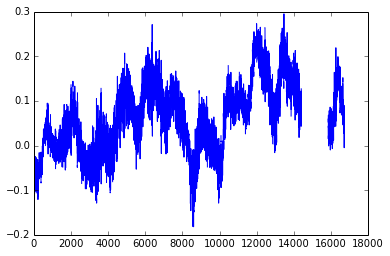

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sealevel)
plt.show()

The values seem plausible (units: meters), but with some missing data.

By the way... we haven't closed the netCDF file yet...

In [31]:
ds.close()

We will see that this can be done in a more elegant way.